In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [2]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
from sklearn.datasets import load_digits
def load_digit():
    digits=load_digits()
    return digits




In [3]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
data=load_digit()
data.keys
print(data.feature_names)
print(data.target_names)


['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


In [4]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(data.data.shape)
print(data.target.shape)
print(type(data.data))
print(type(data.target))


(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)
def predict(n_clusters:int,random_state:int,digits):
    km=KMeans(n_clusters=10,random_state=0)
    y_pred=km.fit_predict(digits.data)
    return km,y_pred

model,clusters=predict(10,0,data)
print(clusters.shape)






(1797,)
[5 7 7 ... 7 3 3]


C:\Users\Máté\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
model.cluster_centers_.shape

(10, 64)

[[ 0.00000000e+00  1.11022302e-16  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   1.73472348e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   8.67361738e-19  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  0.00000000e+00
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -8.32667268e-17
  -1.08420217e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

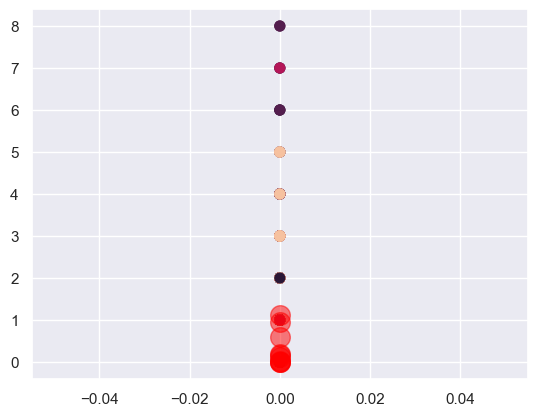

In [23]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
centers=model.cluster_centers_
print(centers)
plt.scatter(data.data[:,0],data.data[:,1],c=clusters,s=50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5)
plt.show()

In [29]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
def get_labels(clusters:np.ndarray,digits):
    result=np.zeros_like(clusters)
    for cluster in range(10):
        mask=(cluster==clusters)
        indices=np.where(mask)[0]
        subarray=digits.target[indices]
        mode=np.bincount(subarray).argmax()
        result[mask]=mode
    return result

predicted_labels=get_labels(clusters,data)
print(predicted_labels)
    



[0 8 8 ... 8 9 9]


In [30]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def cal_accuracy(target_labels:np.array,predicted_labels:np.array):
    accuracy=accuracy_score(target_labels,predicted_labels)
    return accuracy.round(2)

accuracy=cal_accuracy(data.target,predicted_labels)
print(accuracy)

    

0.79


In [2]:
from HAZI09 import KMeansOnDigits
kk=KMeansOnDigits(10,0)
kk.load_dataset()
kk.predict()
kk.get_labels()
print(kk.calc_accuracy()) 

0.79


C:\Users\Máté\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

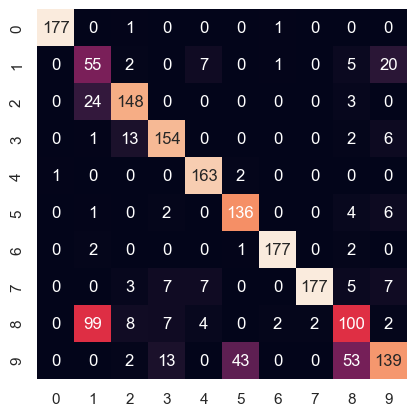

In [34]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
conf=confusion_matrix(data.target,predicted_labels)
sns.heatmap(conf.T,square=True,annot=True,fmt='d',cbar=False)


